# Master SMT 
# Sustainable Finance

## I- Covariance Matrix and Nan values

### For each covariance estimation, reduce the number of Nan values in your return dataset

- Dataset with maximum coverage (time periods, companies, esg scores, Co2 emissions etc.) 


- Nan values are not optimal to estimate covariance matrices 


- To reduce the number of Nan values in your dataset and estimate more precisely your covariance matrix, you can drop companies with less than 3 or 2 years of monthly returns

### For each covariance estimation, find a way to compute covariances between companies with different time coverage (pandas vs numpy)

- Use a loop to avoid Nan values


- Use a Mask to avoid Nan values 
(np.ma.cov)

https://numpy.org/doc/stable/reference/generated/numpy.ma.cov.html

## II- Rolling and EWMA approaches

- Rolling 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

- EWMA


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

## Example: 4-Stocks Portfolio


ISIN codes

- Facebook: US30303M1027
- Apple : US0378331005
- Nike : US6541061031
- Tesla : US88160R1014
- Alphabet : US02079K1079
- Amazon : US0231351067

### Import 

In [203]:
import numpy as np
import pandas as pd

%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [204]:
ret= pd.read_excel("C:\\Users\\lvallee1\\OneDrive - Université de Lausanne\\Bureau\\SEF_2022_2023\\Data\\MSCI-ESG\\Excel\\Returns\\monthlyreturns.xlsx")

In [228]:
ret.head()

,AEA000201011,AEA001501013,AEA002001013,AED000201015,AED000601016,AED000901010,AED001301012,AED001501017,AEDFXA0M6V00,AEE000301011,...,ZAE000216537,ZAE000221370,ZAE000248498,ZAE000248506,ZAE000255360,ZAE000255915,ZAE000259479,ZAE000259701,ZAE000265971,ZAE000269890
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.057260,NaN,NaN,-0.134138,-0.111384,NaN,NaN,NaN,-0.137366
2002-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.111637,NaN,NaN,0.062539,-0.224885,NaN,NaN,NaN,0.065310
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.206354,NaN,NaN,0.007652,0.096314,NaN,NaN,NaN,-0.080122
2002-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.084209,NaN,NaN,0.090537,-0.104393,NaN,NaN,NaN,-0.198591
2002-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.513709,NaN,NaN,0.088148,0.315774,NaN,NaN,NaN,0.406500


In [206]:
# Rename column Date
ret.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)

In [207]:
# Date as index column
ret.set_index("Date", inplace=True)

In [208]:
# Apple + Nike + Google + Amazon + Facebook
Isin= ["US0378331005","US6541061031", "US02079K1079","US0231351067","US30303M1027"]
ret_ = ret[Isin]
ret_

,US0378331005,US6541061031,US02079K1079,US0231351067,US30303M1027
Date,,,,,
2002-01-31,0.040357,0.065666,NaN,0.031457,NaN
2002-02-28,0.114636,0.067210,NaN,0.268954,NaN
2002-03-31,-0.039343,-0.019493,NaN,0.120894,NaN
2002-04-30,0.043081,0.000040,NaN,-0.038340,NaN
2002-05-31,-0.019632,-0.069119,NaN,0.114193,NaN
2002-06-30,-0.044618,-0.047915,NaN,0.089153,NaN
2002-07-31,-0.255354,0.051290,NaN,-0.245554,NaN
2002-08-31,-0.132469,-0.139194,NaN,0.045020,NaN
2002-09-30,-0.003369,-0.081277,NaN,0.055085,NaN


In [209]:
ret_.rename(columns = {'US0378331005':'Apple', 'US6541061031':'Nike','US02079K1079':'Google' ,'US0231351067':'Amazon', 'US30303M1027':'Facebook'}, inplace = True)

C:\Users\lvallee1\AppData\Local\Temp\ipykernel_17788\1721306941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_.rename(columns = {'US0378331005':'Apple', 'US6541061031':'Nike','US02079K1079':'Google' ,'US0231351067':'Amazon', 'US30303M1027':'Facebook'}, inplace = True)


In [210]:
ret_

,Apple,Nike,Google,Amazon,Facebook
Date,,,,,
2002-01-31,0.040357,0.065666,NaN,0.031457,NaN
2002-02-28,0.114636,0.067210,NaN,0.268954,NaN
2002-03-31,-0.039343,-0.019493,NaN,0.120894,NaN
2002-04-30,0.043081,0.000040,NaN,-0.038340,NaN
2002-05-31,-0.019632,-0.069119,NaN,0.114193,NaN
2002-06-30,-0.044618,-0.047915,NaN,0.089153,NaN
2002-07-31,-0.255354,0.051290,NaN,-0.245554,NaN
2002-08-31,-0.132469,-0.139194,NaN,0.045020,NaN
2002-09-30,-0.003369,-0.081277,NaN,0.055085,NaN


<AxesSubplot:xlabel='Date'>

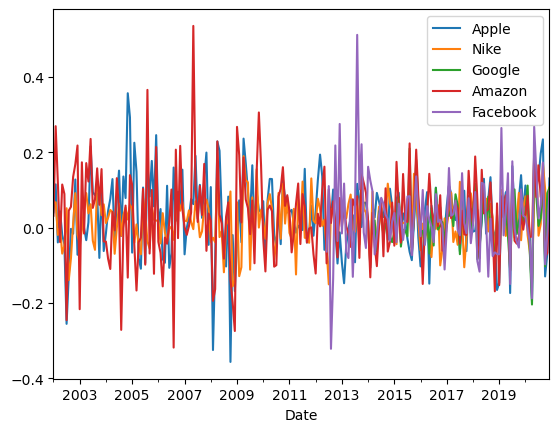

In [211]:
ret_.plot()

In [212]:
#5Y
ret_5Y=ret_.loc["2016-01-31":]

### 1) Rolling 


In [213]:
ret_5Y

,Apple,Nike,Google,Amazon,Facebook
Date,,,,,
2016-01-31,-0.102946,-0.060055,-0.010673,-0.004669,-0.022984
2016-02-29,-0.083888,0.010559,-0.009027,-0.149550,0.099653
2016-03-31,0.048126,-0.003799,-0.044138,0.007359,-0.045776
2016-04-30,0.094104,-0.018591,0.043232,0.033607,0.056815
2016-05-31,-0.148651,-0.032472,-0.068919,0.142607,0.021610
2016-06-30,0.057906,-0.078201,0.051448,0.052045,0.001773
2016-07-31,-0.026104,0.015351,-0.047565,0.008672,-0.038625
2016-08-31,0.105956,-0.003598,0.105297,0.057958,0.088623
2016-09-30,0.011827,0.059377,-0.005261,0.003752,0.014947


In [214]:
ret_5Y.rolling(window=5).cov()

Apple      Nike    Google    Amazon  Facebook
Date                                                                 
2016-01-31 Apple          NaN       NaN       NaN       NaN       NaN
           Nike           NaN       NaN       NaN       NaN       NaN
           Google         NaN       NaN       NaN       NaN       NaN
           Amazon         NaN       NaN       NaN       NaN       NaN
           Facebook       NaN       NaN       NaN       NaN       NaN
2016-02-29 Apple          NaN       NaN       NaN       NaN       NaN
           Nike           NaN       NaN       NaN       NaN       NaN
           Google         NaN       NaN       NaN       NaN       NaN
           Amazon         NaN       NaN       NaN       NaN       NaN
           Facebook       NaN       NaN       NaN       NaN       NaN
2016-03-31 Apple          NaN       NaN       NaN       NaN       NaN
           Nike           NaN       NaN       NaN       NaN       NaN
           Google         NaN       NaN       NaN       NaN       NaN
           Amazon         NaN       NaN       NaN       NaN       NaN
           Facebook       NaN       NaN       NaN       NaN       NaN
2016-04-30 Apple          NaN       NaN       NaN       NaN       NaN
           Nike           NaN       NaN       NaN       NaN       NaN
           Google         NaN       NaN       NaN       NaN       NaN
           Amazon         NaN       NaN       NaN       NaN       NaN
           Facebook       NaN       NaN       NaN       NaN       NaN
2016-05-31 Apple     0.010859  0.001039  0.002646 -0.000880 -0.000459
           Nike      0.001039  0.000739  0.000070 -0.001492  0.000783
           Google    0.002646  0.000070  0.001790 -0.001694  0.001073
           Amazon   -0.000880 -0.001492 -0.001694  0.010934 -0.002696
           Facebook -0.000459  0.000783  0.001073 -0.002696  0.003465
2016-06-30 Apple     0.010862 -0.000828  0.003937 -0.000391 -0.001864
           Nike     -0.000828  0.001160 -0.000797 -0.002206  0.000654
           Google    0.003937 -0.000797  0.002786 -0.001050  0.000728
           Amazon   -0.000391 -0.002206 -0.001050  0.011278 -0.003116
           Facebook -0.001864  0.000654  0.000728 -0.003116  0.003032
2016-07-31 Apple     0.009294 -0.000359  0.004186 -0.004034  0.000266
           Nike     -0.000359  0.001249 -0.001176 -0.000867 -0.000604
           Google    0.004186 -0.001176  0.003152 -0.000803  0.001215
           Amazon   -0.004034 -0.000867 -0.000803  0.003092  0.001154
           Facebook  0.000266 -0.000604  0.001215  0.001154  0.001820
2016-08-31 Apple     0.011207 -0.000069  0.007075 -0.003504  0.002617
           Nike     -0.000069  0.001251 -0.000434 -0.000618  0.000063
           Google    0.007075 -0.000434  0.005305 -0.001233  0.002513
           Amazon   -0.003504 -0.000618 -0.001233  0.002554  0.000552
           Facebook  0.002617  0.000063  0.002513  0.000552  0.002413
2016-09-30 Apple     0.009375  0.000057  0.006388 -0.003069  0.001862
           Nike      0.000057  0.002658 -0.000732 -0.001614 -0.000042
           Google    0.006388 -0.000732  0.005132 -0.000834  0.002268
           Amazon   -0.003069 -0.001614 -0.000834  0.003111  0.000837
           Facebook  0.001862 -0.000042  0.002268  0.000837  0.002120
2016-10-31 Apple     0.002509 -0.001418  0.002786  0.001285  0.002059
           Nike     -0.001418  0.004410 -0.000900 -0.002014 -0.000089
           Google    0.002786 -0.000900  0.003420  0.001059  0.002346
           Amazon    0.001285 -0.002014  0.001059  0.001212  0.000770
           Facebook  0.002059 -0.000089  0.002346  0.000770  0.002118
2016-11-30 Apple     0.002833 -0.000652  0.002628  0.002145  0.002286
           Nike     -0.000652  0.003917 -0.000374 -0.000813 -0.000208
           Google    0.002628 -0.000374  0.003145  0.000965  0.002491
           Amazon    0.002145 -0.000813  0.000965  0.003194  0.001137
           Facebook  0.002286 -0.000208  0.002491  0.001137  0.002090
2016-12-31 Apple     0.002514 -0.0

In [215]:
#Check if correct 
ret_5Y.iloc[0:5,:].cov

<bound method DataFrame.cov of                Apple      Nike    Google    Amazon  Facebook
Date                                                        
2016-01-31 -0.102946 -0.060055 -0.010673 -0.004669 -0.022984
2016-02-29 -0.083888  0.010559 -0.009027 -0.149550  0.099653
2016-03-31  0.048126 -0.003799 -0.044138  0.007359 -0.045776
2016-04-30  0.094104 -0.018591  0.043232  0.033607  0.056815
2016-05-31 -0.148651 -0.032472 -0.068919  0.142607  0.021610>

### 1) EWMA 


In [216]:
ret_5Y.ewm(com=0.4).cov()

Apple      Nike    Google    Amazon  Facebook
Date                                                                 
2016-01-31 Apple          NaN       NaN       NaN       NaN       NaN
           Nike           NaN       NaN       NaN       NaN       NaN
           Google         NaN       NaN       NaN       NaN       NaN
           Amazon         NaN       NaN       NaN       NaN       NaN
           Facebook       NaN       NaN       NaN       NaN       NaN
2016-02-29 Apple     0.000182  0.000673  0.000016 -0.001381  0.001169
           Nike      0.000673  0.002493  0.000058 -0.005115  0.004330
           Google    0.000016  0.000058  0.000001 -0.000119  0.000101
           Amazon   -0.001381 -0.005115 -0.000119  0.010495 -0.008884
           Facebook  0.001169  0.004330  0.000101 -0.008884  0.007520
2016-03-31 Apple     0.008768  0.000235 -0.002222  0.007682 -0.007310
           Nike      0.000235  0.000555 -0.000009 -0.001059  0.000888
           Google   -0.002222 -0.000009  0.000568 -0.002064  0.001953
           Amazon    0.007682 -0.001059 -0.002064  0.009645 -0.008903
           Facebook -0.007310  0.000888  0.001953 -0.008903  0.008237
2016-04-30 Apple     0.005508 -0.000488  0.002382  0.004345  0.000740
           Nike     -0.000488  0.000245 -0.000523 -0.000683 -0.000234
           Google    0.002382 -0.000523  0.002968  0.001601  0.003080
           Amazon    0.004345 -0.000683  0.001601  0.004242 -0.000435
           Facebook  0.000740 -0.000234  0.003080 -0.000435  0.004533
2016-05-31 Apple     0.023724  0.001675  0.009783 -0.011485  0.001754
           Nike      0.001675  0.000217  0.000598 -0.001230  0.000061
           Google    0.009783  0.000598  0.004579 -0.004772  0.001501
           Amazon   -0.011485 -0.001230 -0.004772  0.008471 -0.001008
           Facebook  0.001754  0.000061  0.001501 -0.001008  0.001381
2016-06-30 Apple     0.016290 -0.002890  0.009053 -0.006894 -0.001103
           Nike     -0.002890  0.001249 -0.002042  0.000930  0.000582
           Google    0.009053 -0.002042  0.005423 -0.003741 -0.000626
           Amazon   -0.006894  0.000930 -0.003741  0.003788  0.000322
           Facebook -0.001103  0.000582 -0.000626  0.000322  0.000662
2016-07-31 Apple     0.005493 -0.002381  0.004001 -0.000805  0.000617
           Nike     -0.002381  0.003226 -0.003196 -0.001877 -0.001551
           Google    0.004001 -0.003196  0.003927  0.000883  0.001385
           Amazon   -0.000805 -0.001877  0.000883  0.002680  0.001374
           Facebook  0.000617 -0.001551  0.001385  0.001374  0.001216
2016-08-31 Apple     0.008161 -0.000481  0.008422  0.001555  0.006434
           Nike     -0.000481  0.000927 -0.000692 -0.000482 -0.000254
           Google    0.008422 -0.000692  0.009159  0.002223  0.007306
           Amazon    0.001555 -0.000482  0.002223  0.001248  0.002086
           Facebook  0.006434 -0.000254  0.007306  0.002086  0.006288
2016-09-30 Apple     0.003979 -0.001898  0.004407  0.001680  0.002971
           Nike     -0.001898  0.002146 -0.002336 -0.001459 -0.001283
           Google    0.004407 -0.002336  0.005048  0.002137  0.003463
           Amazon    0.001680 -0.001459  0.002137  0.001284  0.001446
           Facebook  0.002971 -0.001283  0.003463  0.001446  0.002575
2016-10-31 Apple     0.001431 -0.002185  0.001136  0.001284  0.000778
           Nike     -0.002185  0.009789  0.000021 -0.004909  0.000030
           Google    0.001136  0.000021  0.001494  0.000273  0.001019
           Amazon    0.001284 -0.004909  0.000273  0.002566  0.000219
           Facebook  0.000778  0.000030  0.001019  0.000219  0.000753
2016-11-30 Apple     0.001858 -0.000675  0.000162  0.003652  0.000652
           Nike     -0.000675  0.002799  0.000012 -0.001518 -0.000007
           Google    0.000162  0.000012  0.000445 -0.000291  0.000243
           Amazon    0.003652 -0.001518 -0.000291  0.008183  0.001038
           Facebook  0.000652 -0.000007  0.000243  0.001038  0.000343
2016-12-31 Apple     0.000710 -0.0

## III)  Using Scipy for Optimization 

Scipy provides an optimiser that we will use now.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Other: PyportfolioOpt

https://pyportfolioopt.readthedocs.io/en/latest/

### Function Minimisation

Find the minimum of $f(x)=\exp((x-0.7)^2)$

### One-Dimensional Function

In [217]:
# Define the function
def f(x):
     return -np.exp(-(x-0.7)**2)

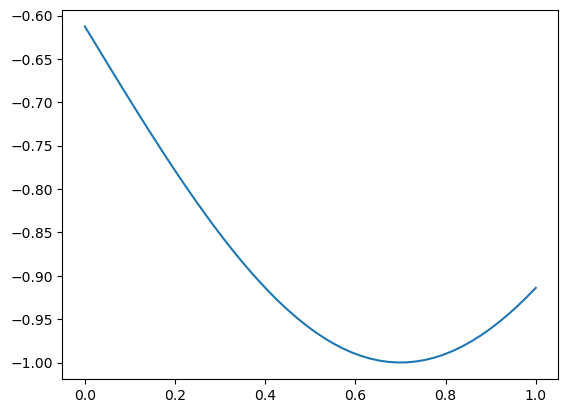

In [218]:
# Use Numpys vector to get back a vector of function values and plot them
x = np.linspace(0.0,1.0,50)
plt.plot(x,f(x))

In [219]:
# This uses Brent's method to get the minimimum of a function
# You can impose bounds but no other constraints
from scipy import optimize
result = optimize.minimize_scalar(f)
print(result)

     fun: -1.0
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 13
     nit: 9
 success: True
       x: 0.6999999997839409


### Non-Convex Function

In [220]:
def f(x):
    return (x - 2.0) * x * (x + 2.0)**2

In [221]:
x = np.linspace(-3.0,2.0,50)

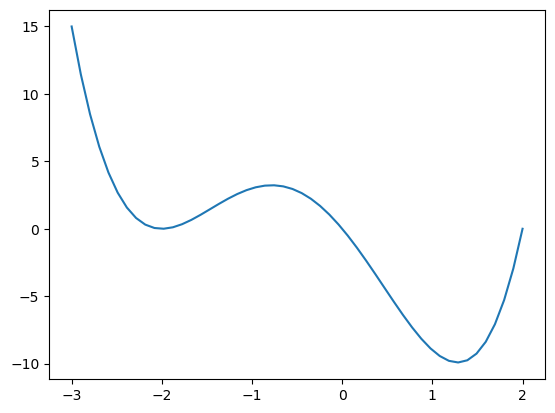

In [222]:
plt.plot(x,f(x))

In [223]:
# The solution found depends on the initial starting point
result = optimize.minimize_scalar(f, bounds=(-3,-1), method = "Bounded")

In [224]:
print(result)

     fun: 3.2836517984978577e-13
 message: 'Solution found.'
    nfev: 12
     nit: 12
  status: 0
 success: True
       x: -2.000000202597239


In [225]:
# With no bounds it finds the global minimum
result = optimize.minimize_scalar(f)

In [226]:
print(result)

     fun: -9.914949590828147
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458


Lou-Salomé Vallée: lou-salome.vallee@unil.ch 

2022-2023